<a href="https://colab.research.google.com/github/GyanendraChaubey/Intrusion-Detection/blob/main/All_attack_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read the data
data=pd.read_csv("/content/drive/MyDrive/All_attack.csv")

In [4]:
#Making a copy of data
data=data.copy()

#Feature Engineering

1. Understanding Data

In [5]:
#checking the missing values
data.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [6]:
data = data[data.proto != 'icmp']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046004 entries, 0 to 1048553
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   pkSeqID            1046004 non-null  int64  
 1   proto              1046004 non-null  object 
 2   saddr              1046004 non-null  object 
 3   sport              1046004 non-null  object 
 4   daddr              1046004 non-null  object 
 5   dport              1046004 non-null  object 
 6   seq                1046004 non-null  int64  
 7   stddev             1046004 non-null  float64
 8   N_IN_Conn_P_SrcIP  1046004 non-null  int64  
 9   min                1046004 non-null  float64
 10  state_number       1046004 non-null  int64  
 11  mean               1046004 non-null  float64
 12  N_IN_Conn_P_DstIP  1046004 non-null  int64  
 13  drate              1046004 non-null  float64
 14  srate              1046004 non-null  float64
 15  max                1046004 non-n

In [8]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [9]:
data['sport']=data['sport'].astype(int)
data['dport']=data['dport'].astype(int)

In [10]:
data['proto'].unique()

array(['udp', 'tcp', 'arp', 'ipv6-icmp'], dtype=object)

In [11]:
data['saddr'].unique()

array(['192.168.100.150', '192.168.100.147', '192.168.100.149',
       '192.168.100.148', '192.168.100.3', '192.168.100.5',
       '192.168.100.6', '192.168.100.27', 'fe80::250:56ff:febe:254',
       '192.168.100.7', 'fe80::250:56ff:febe:e9d9', '192.168.100.46',
       'fe80::250:56ff:febe:26db', '192.168.100.1',
       'fe80::250:56ff:febe:89ee', '192.168.100.4'], dtype=object)

In [12]:
data['daddr'].unique()

array(['192.168.100.3', '192.168.100.7', '192.168.100.5', '192.168.100.6',
       '192.168.100.149', '192.168.100.147', '192.168.100.150',
       '192.168.217.2', '192.168.100.55', '192.168.100.148',
       '255.255.255.255', '96.7.49.66', '205.251.197.206',
       '192.168.100.1', '205.251.194.201', '224.0.0.251',
       '205.251.196.32', '52.201.147.106', '192.5.5.241', '192.55.83.30',
       '192.31.80.30', '8.8.8.8', '13.55.154.73', 'ff02::2',
       '192.41.162.30', '129.250.35.250', 'ff02::fb', '27.124.125.250',
       '199.19.56.1', '192.33.14.30', '205.251.199.148', '192.58.128.30',
       '192.12.94.30', '205.251.196.160', '205.251.199.194',
       '192.36.148.17', '184.85.248.65', '192.33.4.12', '52.11.124.117',
       '192.168.100.255', '192.54.112.30', 'ff02::1', '172.217.25.170',
       '205.251.194.102', '192.112.36.4', '205.251.194.86',
       '192.168.100.27', '192.52.178.30', '205.251.195.59', '52.35.35.13'],
      dtype=object)

In [13]:
data.describe()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06,1.046004e+06
mean,1.829324e+06,3.301256e+04,3.223455e+02,1.215495e+05,8.889899e-01,8.268758e+01,1.021489e+00,3.129964e+00,2.237113e+00,9.268317e+01,4.541708e-01,3.502098e+00,3.028325e+00,9.998872e-01
std,1.056341e+06,1.906806e+04,2.850466e+03,7.569577e+04,8.032379e-01,2.429895e+01,1.485218e+00,1.183859e+00,1.515612e+00,1.769381e+01,6.718704e+01,1.059406e+03,1.856879e+00,1.062062e-02
min,5.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.143435e+05,1.640500e+04,8.000000e+01,5.521500e+04,3.063900e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.872997e-01,1.000000e+02,0.000000e+00,1.571080e-01,2.863353e-01,1.000000e+00
50%,1.829386e+06,3.341800e+04,8.000000e+01,1.180420e+05,8.051040e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.692470e+00,1.000000e+02,0.000000e+00,2.839140e-01,4.011591e+00,1.000000e+00
75%,2.743770e+06,4.967100e+04,8.000000e+01,1.850040e+05,1.745363e+00,1.000000e+02,2.200663e+00,4.000000e+00,3.566639e+00,1.000000e+02,0.000000e+00,4.890120e-01,4.296742e+00,1.000000e+00
max,3.668438e+06,6.553500e+04,6.553500e+04,2.622070e+05,2.496763e+00,1.000000e+02,4.980471e+00,8.000000e+00,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [14]:
#Removing the unwanted coloumns
col=['saddr','daddr','subcategory','attack']
data=data.drop(columns=col,axis=1)

In [15]:
#Removing the dublicate values
data.drop_duplicates(keep='first',inplace=True)

2. Exploratory Data Analysis

In [16]:
data.head()

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category
0,3142762,udp,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,DDoS
1,2432264,tcp,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,DDoS
2,1976315,tcp,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,DDoS
3,1240757,udp,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,DoS
4,3257991,udp,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,DDoS


In [17]:
data['category']=data['category'].map({'Normal':0,'DDoS':1,'DoS':2,'Reconnaissance':3})

In [18]:
#Frequency of each category
data['proto'].value_counts()

udp          570456
tcp          475491
arp              54
ipv6-icmp         3
Name: proto, dtype: int64

In [19]:
#relationship between the independent variables
data.corr()

,pkSeqID,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category
pkSeqID,1.000000,0.021723,0.129730,-0.021074,0.167044,-0.027273,0.291555,0.197757,0.408369,0.374464,0.011208,0.004723,0.359412,-0.650910
sport,0.021723,1.000000,0.028895,0.144286,-0.059111,-0.049517,0.054589,-0.000720,0.003086,-0.015188,-0.005156,0.002367,-0.016516,0.020743
dport,0.129730,0.028895,1.000000,-0.121700,-0.089976,-0.092439,-0.051536,-0.051529,-0.115370,-0.063144,0.035255,0.001953,-0.128880,0.208436
seq,-0.021074,0.144286,-0.121700,1.000000,0.067572,0.060710,0.013167,0.055900,0.052721,0.038017,-0.010016,-0.003982,0.065482,-0.080400
stddev,0.167044,-0.059111,-0.089976,0.067572,1.000000,0.036454,-0.378872,0.345236,0.346912,0.027574,-0.007413,-0.003244,0.666533,-0.110529
N_IN_Conn_P_SrcIP,-0.027273,-0.049517,-0.092439,0.060710,0.036454,1.000000,0.024543,0.043426,0.054411,0.572465,-0.008073,-0.005094,0.057345,0.003352
min,0.291555,0.054589,-0.051536,0.013167,-0.378872,0.024543,1.000000,0.278136,0.694317,0.099065,-0.004511,-0.001828,0.426227,-0.213010
state_number,0.197757,-0.000720,-0.051529,0.055900,0.345236,0.043426,0.278136,1.000000,0.579574,-0.030892,-0.003839,-0.003778,0.574247,0.030622
mean,0.408369,0.003086,-0.115370,0.052721,0.346912,0.054411,0.694317,0.579574,1.000000,0.106502,-0.009796,-0.004128,0.907809,-0.260155
N_IN_Conn_P_DstIP,0.374464,-0.015188,-0.063144,0.038017,0.027574,0.572465,0.099065,-0.030892,0.106502,1.000000,-0.004500,-0.003638,0.084699,-0.395550


In [20]:
#Cross tables and data visualization
#Extracting the coloumn names
data.columns

Index(['pkSeqID', 'proto', 'sport', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'category'],
      dtype='object')

In [21]:
#proto proportion table
pd.crosstab(index=data['proto'],columns='count',normalize=True)

col_0,count
proto,
arp,0.000052
ipv6-icmp,0.000003
tcp,0.454579
udp,0.545367


In [23]:
#proto vs attack
pd.crosstab(index=data['proto'],columns=data['category'],normalize=True)

category,0,1,2,3
proto,,,,
arp,0.000010,0.000010,0.000011,0.000022
ipv6-icmp,0.000003,0.000000,0.000000,0.000000
tcp,0.000012,0.267575,0.168795,0.018196
udp,0.000088,0.259135,0.282086,0.004058


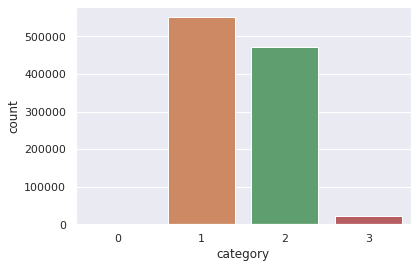

In [24]:
#frequency distribution of attack
sns.countplot(data['category'])

In [25]:

data=data.drop(columns='pkSeqID')

In [26]:
#Categorical Encoding
data=pd.get_dummies(data)

In [27]:
data.head()

,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category,proto_arp,proto_ipv6-icmp,proto_tcp,proto_udp
0,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,0,0,0,1
1,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,0,0,1,0
2,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,0,0,1,0
3,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,2,0,0,0,1
4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,0,0,0,1


In [28]:
#Seperating the features and target variable
y=data['category']
x=data.drop(columns='category')

In [29]:
data.shape

(1046004, 17)

In [30]:
x.shape

(1046004, 16)

#

In [31]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

In [32]:
x.shape

(2203758, 16)

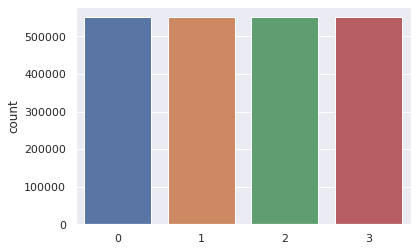

In [33]:
sns.countplot(y)

In [34]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [35]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
#scores = cross_val_score(clf, x_train, y_train, cv=10)
#print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 100.00%


Text(0.5, 1.0, 'Random Forest Classifier')

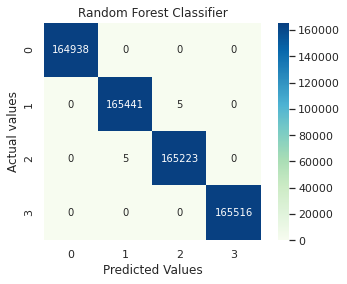

In [38]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Random Forest Classifier')

In [39]:
from sklearn.metrics import classification_report
print('Random Forest Classifier')
print(classification_report(y_test, y_pred))

Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    164938
           1       1.00      1.00      1.00    165446
           2       1.00      1.00      1.00    165228
           3       1.00      1.00      1.00    165516

    accuracy                           1.00    661128
   macro avg       1.00      1.00      1.00    661128
weighted avg       1.00      1.00      1.00    661128



In [ ]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,y_pred)

In [ ]:
#from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, x, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Random Forest Classifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, x, y,axes=axes[:,], cv=cv, ylim=(0.7, 1.01), n_jobs=4)

plt.show()

NameError: ignored